In [16]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np
import pandas as pd
import sys
# sys.path.append("D:\PythonProject\RebuildProject")

from tortreinador.utils.tools import check_outlier
from tortreinador.utils.plot import plot_line_2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tortreinador.utils.preprocessing import load_data
from tortreinador.train import TorchTrainer
from tortreinador.models.MDN import Mixture, NLLLoss
from Rock.Model.MDN_by_Pytorch import mdn
from Model.EnsembleMDN import EnsembleMDN
from tortreinador.utils.View import init_weights, split_weights
from tortreinador.utils.plot import calculate_GMM
import torch
import torch.nn as nn
from tortreinador.utils.metrics import r2_score
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import proplot as pplt
import joblib
import pickle

In [2]:
after_train_data = pd.read_csv("D:\\Resource\\MDN\\MDN_ATTN_5_error\\log_202408281627.csv")

In [8]:
t_x = np.load("D:\\Resource\\MDN\\MDN_ATTN_5_error\\test_x.npy")
t_y = np.load("D:\\Resource\\MDN\\MDN_ATTN_5_error\\test_y.npy")
# m_y = joblib.load("D:\\Resource\\MDN\\MDN_ATTN_5_error\\MDN_v3_yscaler_202408290620.save")
m_y = joblib.load("D:\\Resource\\MDN\\MDN_ATTN_5_error\\MDN_v3_yscaler_202408290620.save")

E:\anaconda\envs\deeplearning\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [3]:
input_parameters = [
    'Mass',
    'Radius',
    'FeMg',
    'SiMg',
]

output_parameters = [
    'WRF',
    'MRF',
    'CRF',
    'WMF',
    'CMF',
    'CPS',
    'CTP',
    'k2'
]

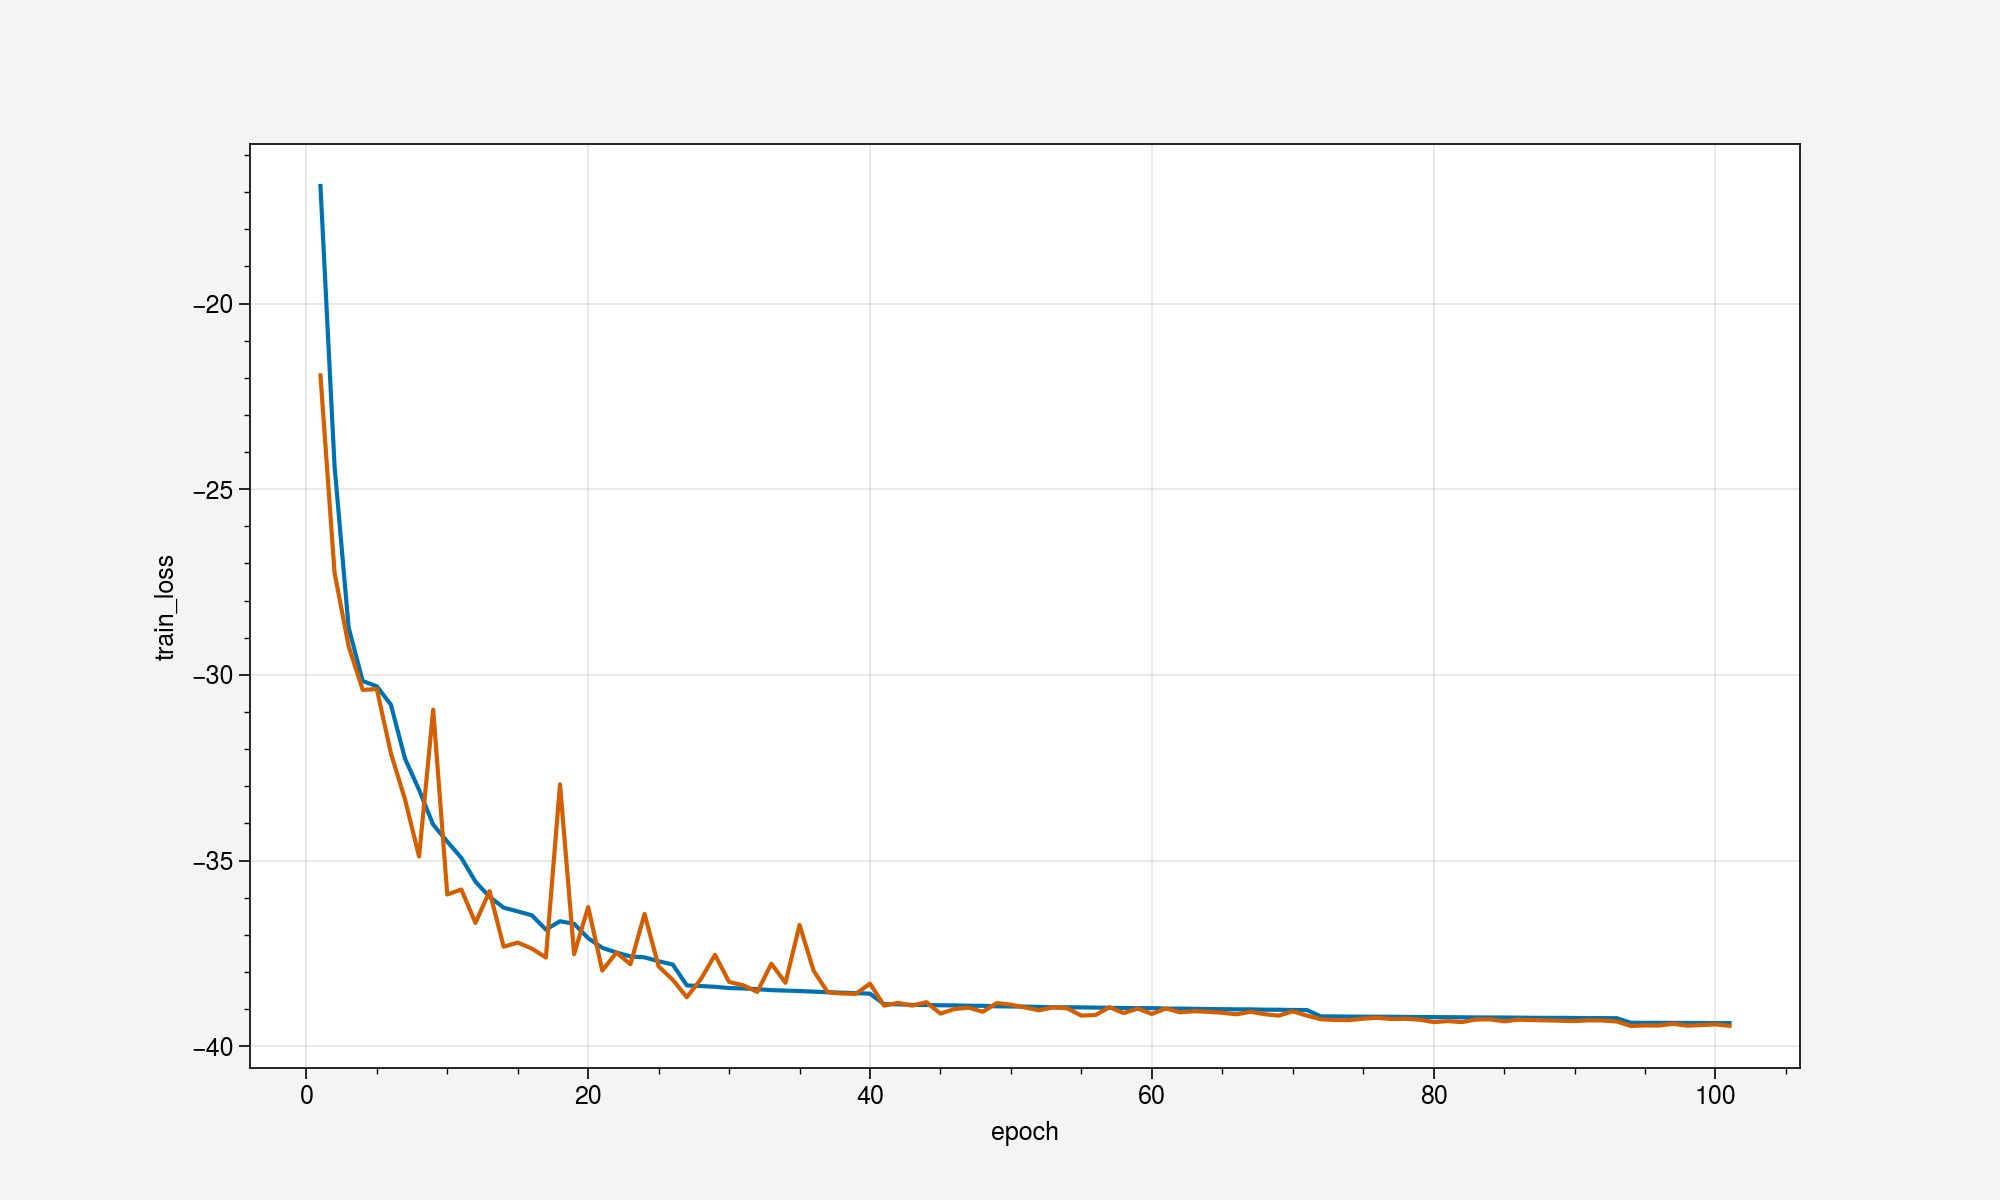

In [4]:
plot_line_2('train_loss', 'val_loss', after_train_data)

In [5]:
model = mdn(input_size=len(input_parameters), output_size=len(output_parameters), num_hidden=512, num_gaussian=10)
init_weights(model)
model = nn.DataParallel(model)
model.load_state_dict(torch.load("D:\\Resource\\MDN\\MDN_ATTN_5_error\\best_model_202408281627.pth"))

<All keys matched successfully>

In [9]:
rand_idx = np.random.randint(len(t_x), size=10000)

sub_t_x = t_x[rand_idx]
sub_t_y = t_y[rand_idx]

In [10]:
model.eval()
# Predict
pi, mu, sigma = model(torch.from_numpy(sub_t_x).to('cuda'))
mix = Mixture()
criterion = NLLLoss()
mse = nn.MSELoss()
sample = mix(pi, mu, sigma).sample()
print("NLLLoss: {}, MSE: {}, R2: {}".format(criterion(pi, mu, sigma, torch.from_numpy(sub_t_y).to('cuda')),
                                            mse(torch.from_numpy(sub_t_y).to('cuda'), sample),
                                            r2_score(sample, torch.from_numpy(sub_t_y).to('cuda'))))
# pi_exp = torch.exp(pi)
# mu_np = mu.detach().cpu().numpy()
# sigma_np = sigma.detach().cpu().numpy()
# pi_np = pi_exp.detach().cpu().numpy()
# 
# y_label = np.arange(0, 1, 0.001).reshape(-1, 1)
# y_label_ = y_label[:, np.newaxis, np.newaxis, :]
# idx_select = np.random.choice(range(0, len(mu_np)), 20000)
# mu_sub = mu_np[idx_select]
# sigma_sub = sigma_np[idx_select]
# pi_sub = pi_np[idx_select]

NLLLoss: -39.49865369599434, MSE: 0.001502605418033453, R2: 0.9587126062647466


In [11]:
y_label = np.arange(0, 1, 0.001).reshape(-1, 1)
GMM_scaled = calculate_GMM(torch.exp(pi).detach().cpu().numpy(), mu.detach().cpu().numpy(), sigma.detach().cpu().numpy(), y_label=y_label)

In [12]:
test_y_inverse = m_y.inverse_transform(sub_t_y)

array([[0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00000000e+000],
       [0.00

Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).


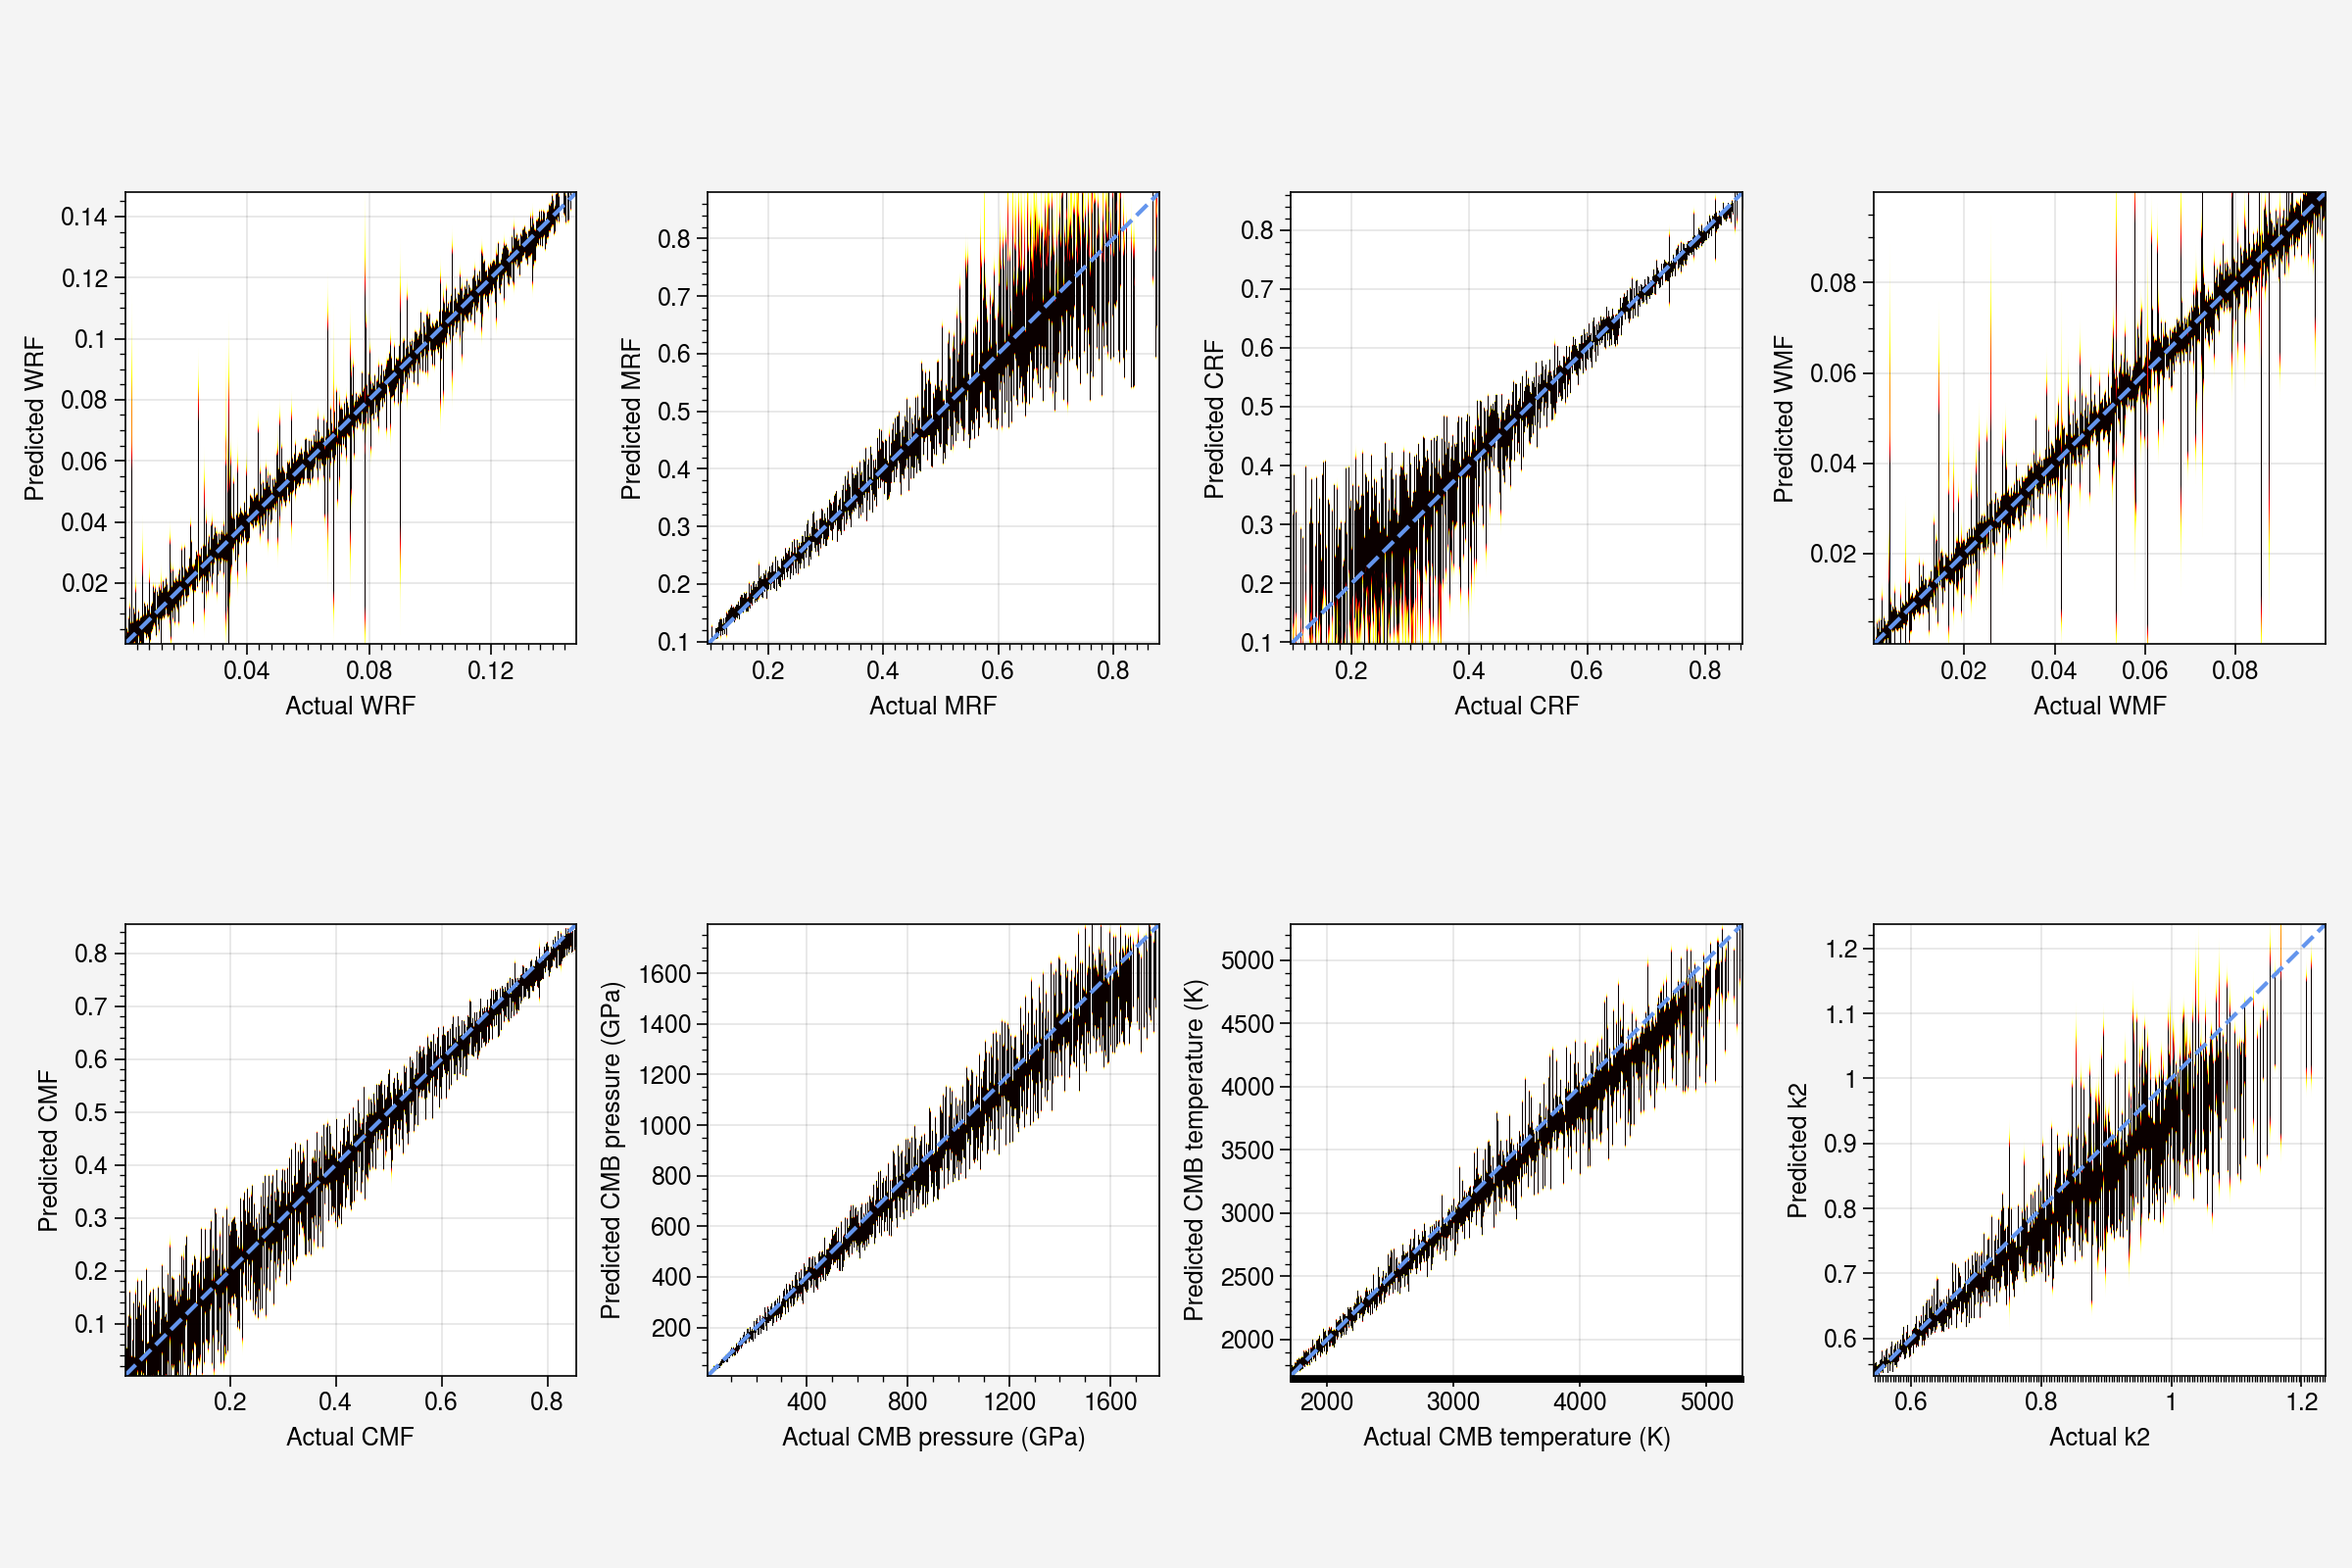

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

xlabels = [
    "Actual WRF","Actual MRF", "Actual CRF", 
    "Actual WMF","Actual CMF", "Actual CMB pressure (GPa)", "Actual CMB temperature (K)",
    "Actual k2", 
]
ylabels = [
    "Predicted WRF","Predicted MRF", "Predicted CRF", 
    "Predicted WMF","Predicted CMF", "Predicted CMB pressure (GPa)", "Predicted CMB temperature (K)",
    "Predicted k2", 
]

# xlocators = [
#     0.04, 0.2, 0.2, 0.02, 0.2, 400, 1000, 0.2
# ]
# xminorlocators = [
#     0.004, 0.02, 0.02, 0.02, 40, 100, 0.04, 0.004
# ]

xlocators = [ticker.MultipleLocator(value) for value in [
    0.04, 0.2, 0.2, 0.02, 0.2, 400, 1000, 0.2
]]
xminorlocators = [ticker.MultipleLocator(value) for value in [
    0.004, 0.02, 0.02, 0.02, 40, 100, 0.04, 0.004
]]
# for i in range(4):
#     row, col = divmod(i, 4)
#     print(row, col)
OUTPUT_DIMS = len(output_parameters)

for o in range(OUTPUT_DIMS):
    row, col = divmod(o, int(OUTPUT_DIMS / 2))
    y_max = max(test_y_inverse[:, o])
    y_min = min(test_y_inverse[:, o])
    
    ax = axs[row, col]
    
    for i in range(0, GMM_scaled.shape[-1], 8):
        tmp = GMM_scaled[:, o + i].reshape(-1, 1)
        tx, ty = [test_y_inverse[int(i / OUTPUT_DIMS), o], y_min]
        cax = ax.imshow(tmp, cmap=plt.cm.hot_r, norm=matplotlib.colors.Normalize(vmin=0, vmax=1), 
                     extent=(tx, tx + 0.0001, ty, y_max), origin='lower')
    
    ax.plot([y_min, y_max], [y_min, y_max], c='cornflowerblue', ls='--')
    ax.set_xlim(y_min, y_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel(xlabels[o])
    ax.set_ylabel(ylabels[o])
    ax.xaxis.set_major_locator(xlocators[o])
    ax.xaxis.set_minor_locator(xminorlocators[o])
# ax.format(
#     xlim=(y_min, y_max), ylim=(y_min, y_max),
#     xlabel=xlabels[0], ylabel=ylabels[0],
#     xlocator=xlocators[0], xminorlocator=xminorlocators[0],
#     # ylocator=xlocators[o], yminorlocator=xminorlocators[o]
# )

# fig.colorbar(cax, ax=ax)
plt.tight_layout()
plt.show()



In [27]:
residual = torch.from_numpy(sub_t_y) - sample.to('cpu')

In [35]:
fig, ax1 = plt.subplots()

# 绘制第一个y轴的图表
ax1.plot(sub_t_y[:, 0], sample.detach().cpu().numpy()[:, 0], 'b-', label='y1: y=x^2')
ax1.set_xlabel('X')
# ax1.set_ylabel('Y1', color='b')
ax1.tick_params(axis='y', labelcolor='b')
# 
# # 创建第二个Y轴
# ax2 = ax1.twinx()  
# ax2.plot(x, y2, 'r-', label='y2: y=x')
# # ax2.set_ylabel('Y2', color='r')
# ax2.tick_params(axis='y', labelcolor='r')

# 添加标题
# plt.title('双Y轴示例图')

# 显示图表
plt.show()

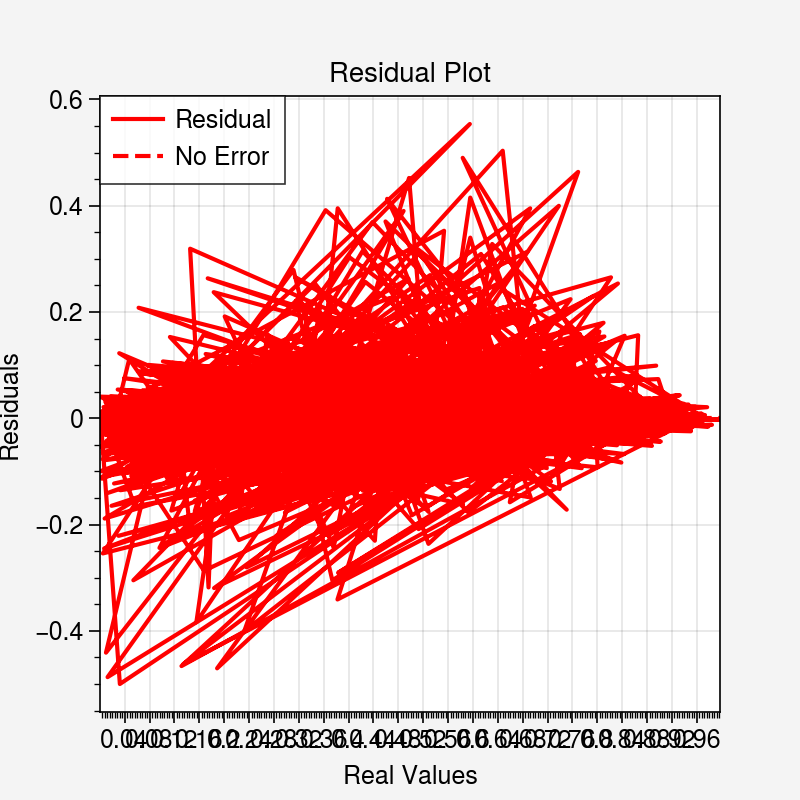

In [45]:
fig, ax = plt.subplots()
ax.plot(sub_t_y[:, 0], residual[:, 0], color='r', label='Residual')
ax.axhline(y=0, color='red', linestyle='--', label='No Error')

xlocators = [ticker.MultipleLocator(value) for value in [
    0.04, 0.2, 0.2, 0.02, 0.2, 400, 1000, 0.2
]]
xminorlocators = [ticker.MultipleLocator(value) for value in [
    0.004, 0.02, 0.02, 0.02, 40, 100, 0.04, 0.004
]]
ax.set_xlim(min(sub_t_y[:, 0]), max(sub_t_y[:, 0]))
ax.xaxis.set_major_locator(xlocators[0])
ax.xaxis.set_minor_locator(xminorlocators[0])

plt.xlabel('Real Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 89205 ticks ([1716.28, ..., 5284.44]), which exceeds Locator.MAXTICKS (1000).


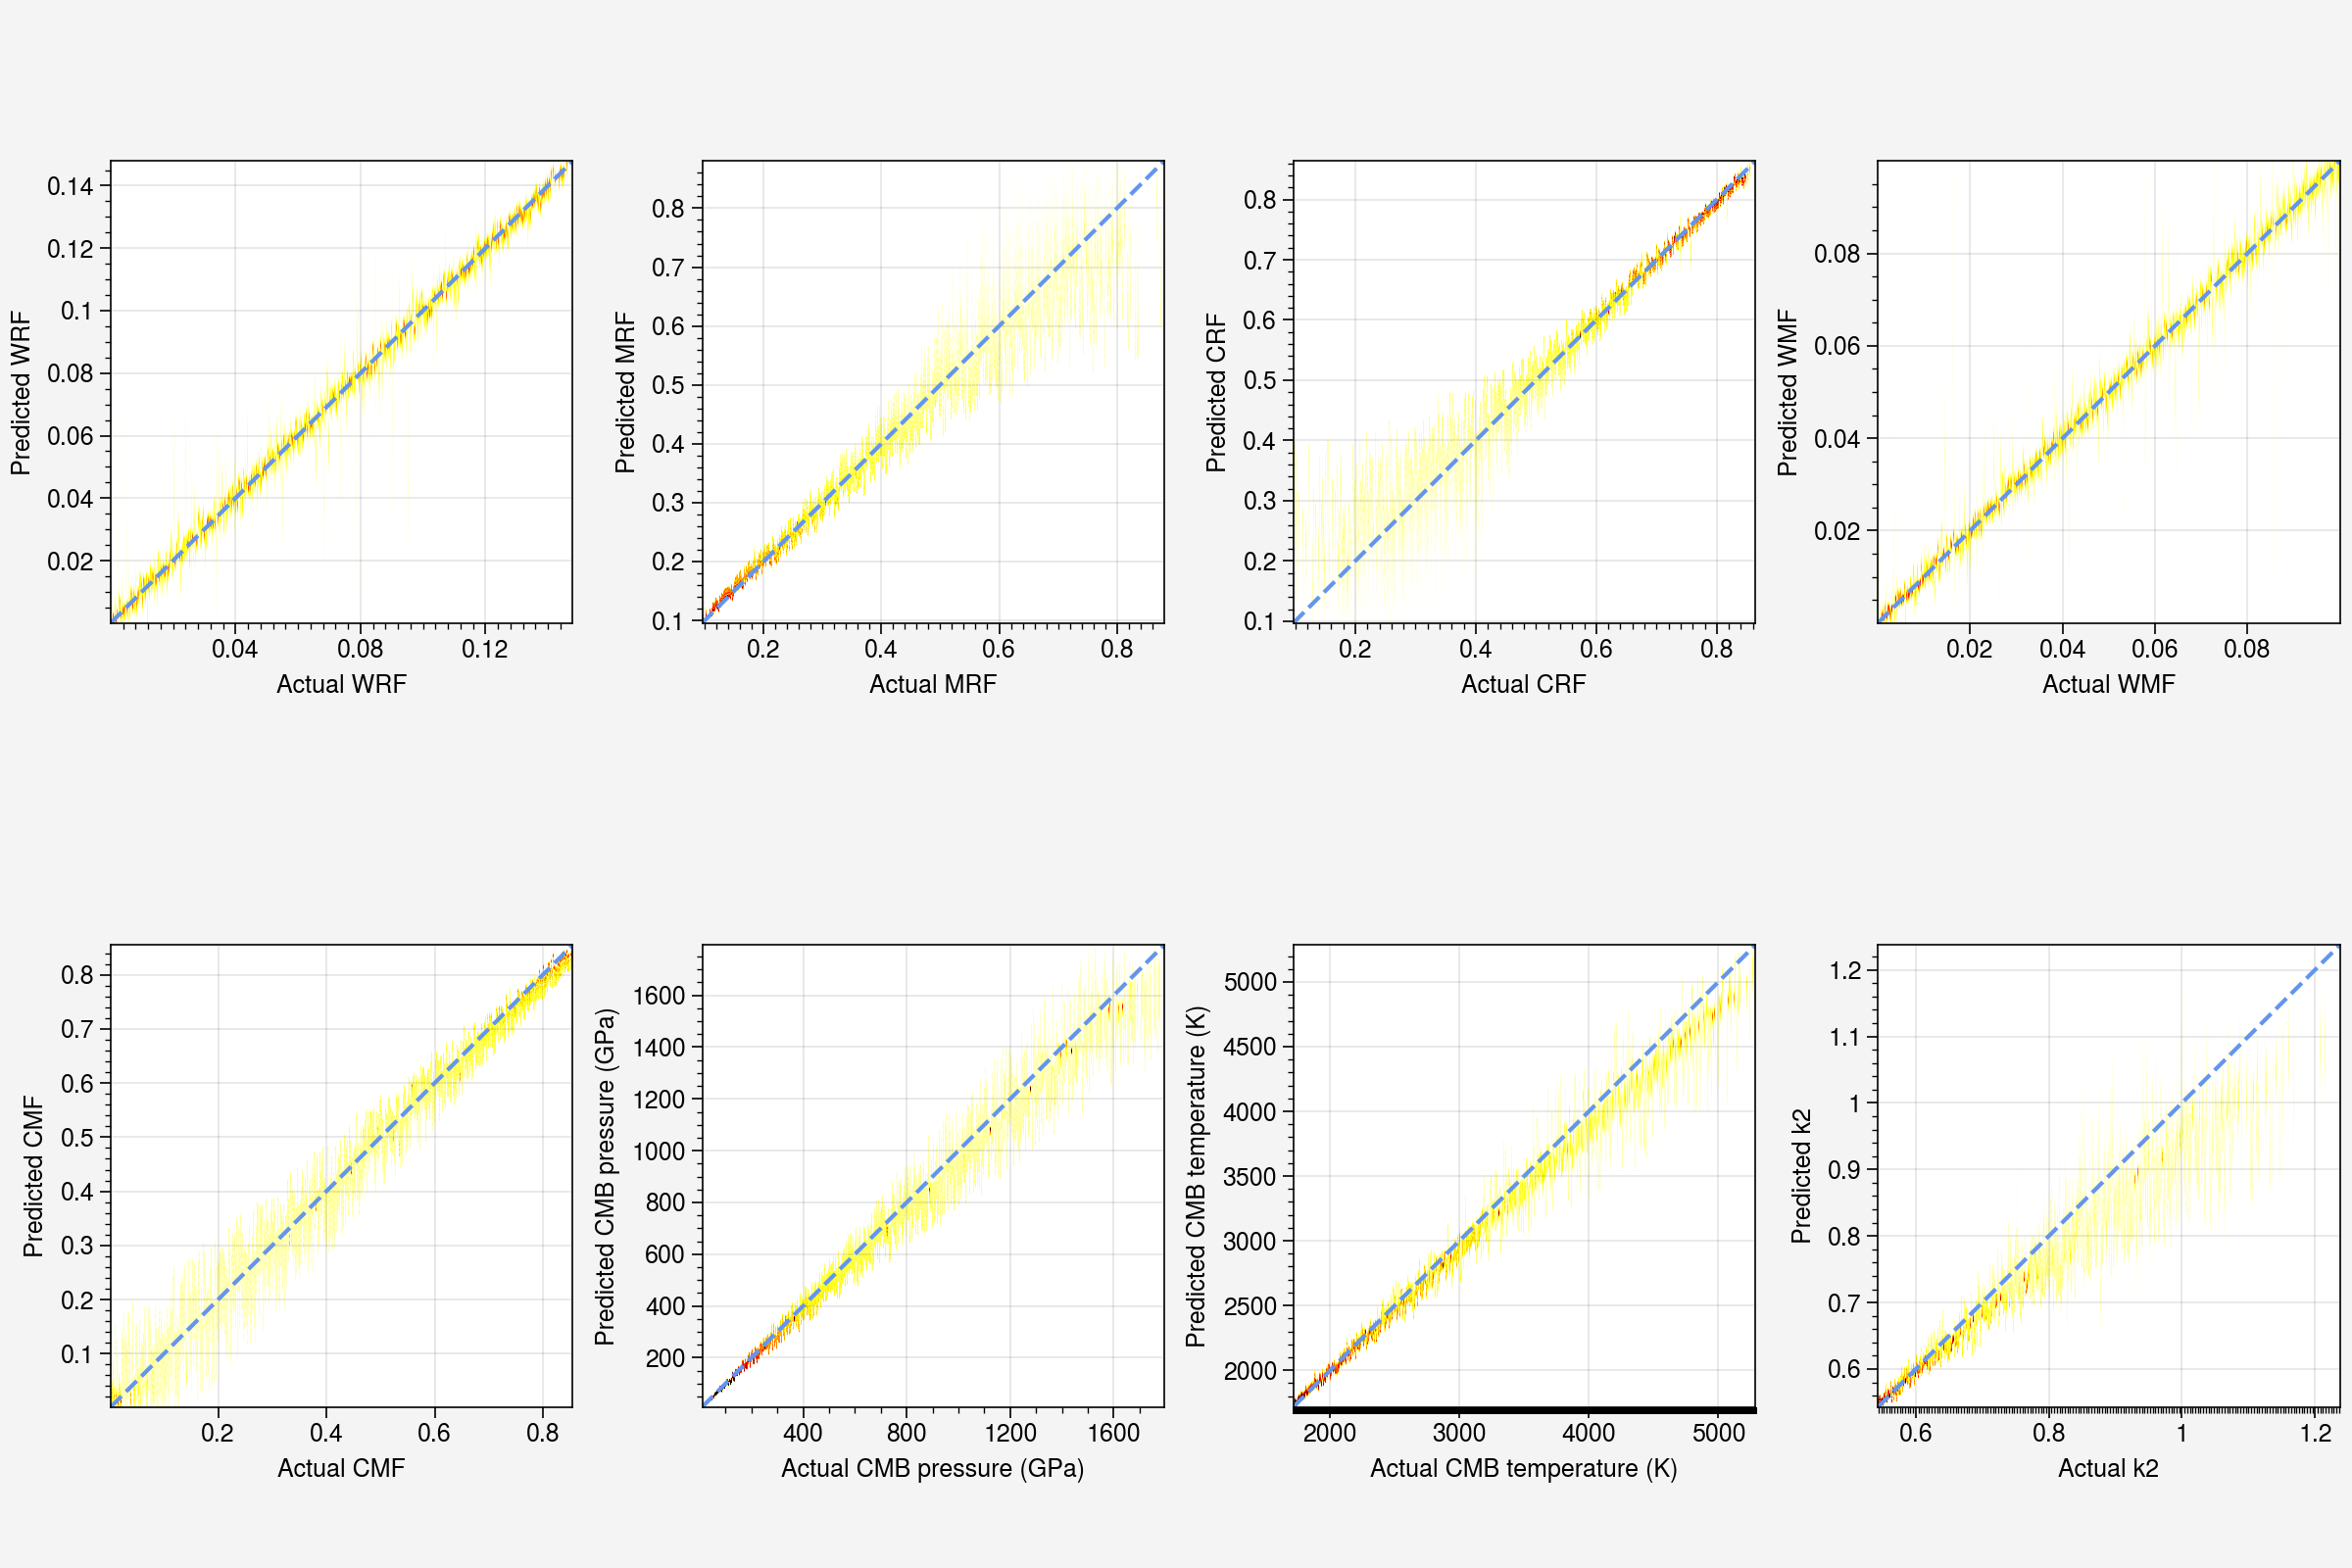

In [18]:
cmap = plt.cm.hot_r
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
fig, axs = pplt.subplots(
#     figsize=(4,4),
    nrows=2, ncols=4,
    share=False, 
    figsize=(12, 8)
#     tight=True,
)

output_parameters = [
    'WRF',
    'MRF',
    'CRF',
    'WMF',
    'CMF', 
    'CPS',
    'CTP',
    'k2'
]


xlabels = [
    "Actual WRF","Actual MRF", "Actual CRF", 
    "Actual WMF","Actual CMF", "Actual CMB pressure (GPa)", "Actual CMB temperature (K)",
    "Actual k2", 
]
ylabels = [
    "Predicted WRF","Predicted MRF", "Predicted CRF", 
    "Predicted WMF","Predicted CMF", "Predicted CMB pressure (GPa)", "Predicted CMB temperature (K)",
    "Predicted k2", 
]

xlocators = [
    0.04, 0.2, 0.2, 0.02, 0.2, 400, 1000, 0.2
]
xminorlocators = [
    0.004, 0.02, 0.02, 0.02, 40, 100, 0.04, 0.004
]

OUTPUT_DIMS = len(output_parameters)

for o in range(OUTPUT_DIMS):
    y_max = max(test_y_inverse[:, o])
    y_min = min(test_y_inverse[:, o])
    for i in range(0, GMM_scaled.shape[-1], OUTPUT_DIMS):
        tx, ty = [test_y_inverse[int(i / OUTPUT_DIMS), o], y_min]
        axs[o].imshow(
                GMM_scaled[:, o + i].reshape(-1, 1),
                cmap=cmap,
                norm=norm,
                origin='lower',
                extent=(tx, tx + 0.0001, ty, y_max)
            )

    axs[o].plot([y_min, y_max], [y_min, y_max], c='cornflowerblue', ls='--')
    axs[o].format(
        xlim=(y_min, y_max), ylim=(y_min, y_max),
        xlabel=xlabels[o], ylabel=ylabels[o],
        xlocator=xlocators[o], xminorlocator=xminorlocators[o],
        # ylocator=xlocators[o], yminorlocator=xminorlocators[o]
    )